In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading package stopwords to /home/dusan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dusan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Ucitavanje skupa podataka 

In [3]:
def make_dataset(filepath):
    df = pd.read_csv(filepath,delimiter = ';', header = None)
    df.columns = ['Text', 'Emotion']
    return df
    

In [24]:
dataset = make_dataset('../dataset/train.txt')

In [97]:
pd.options.display.max_colwidth = 1000
dataset.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love
4,i am feeling grouchy,anger


In [26]:
dataset['Emotion'].unique()
#imamo 6 razlicith emocija

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [27]:
rows,columns = dataset.shape
print(f'Num of rows: {rows}')
print(f'Num of columns: {columns}')
print(f'The dataset has the following attribute names: {list(dataset.columns)}')

Num of rows: 16000
Num of columns: 2
The dataset has the following attribute names: ['Text', 'Emotion']


In [28]:
def pie_chart(dataframe, title):
  counts = dataframe['Emotion'].value_counts()

  spacing = 1.01
  wedgeprops = {'width': spacing, 'edgecolor': 'w'}
  colors = ['#f58c8c', '#cd5f5f', '#6342bb','#c55083','#2698d3','#47b39c']
  counts.plot(kind='pie', colors=colors, autopct='%1.1f%%', wedgeprops=wedgeprops)
  plt.title(title)
  plt.ylabel('')
  plt.show()



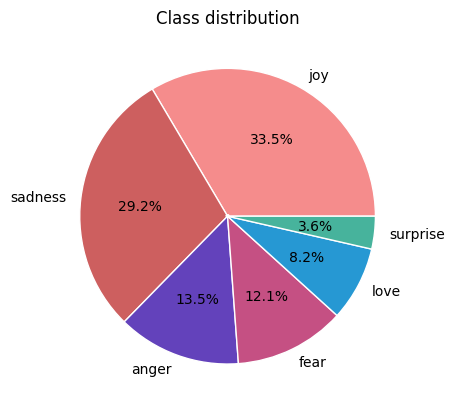

In [34]:
pie_chart(dataset,"Class distribution")

In [18]:
#primecujemo da je vecina instanci iz 2 klase

# Outlieri

Text(0.5, 1.0, 'Surprise')

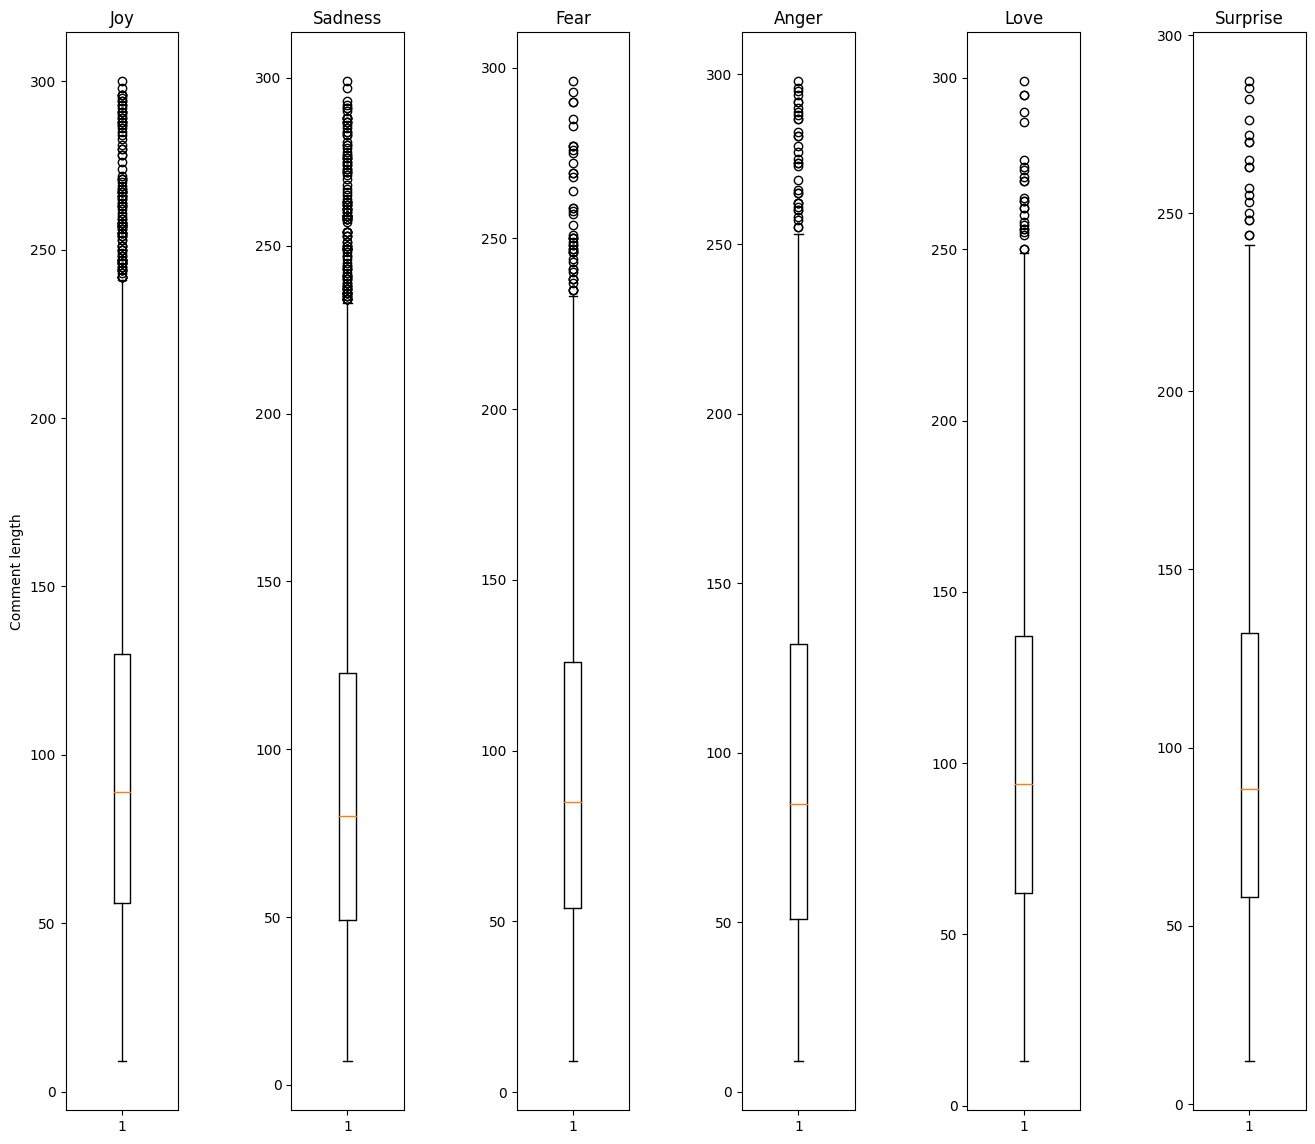

In [56]:
tweets = dataset['Text']
emotions = dataset['Emotion']

tweet_lengths = tweets.str.len()

lengths_joy = sorted(tweet_lengths[emotions == 'joy'])
lengths_sadness = sorted(tweet_lengths[emotions == 'sadness'])
lengths_fear= sorted(tweet_lengths[emotions == 'fear'])
lengths_anger = sorted(tweet_lengths[emotions == 'anger'])
lengths_love = sorted(tweet_lengths[emotions == 'love'])
lengths_surprise = sorted(tweet_lengths[emotions == 'surprise'])


fig,axes = plt.subplots(nrows = 1, ncols = 6,figsize = (16,14))
plt.subplots_adjust(wspace = 1)

plt.subplot(1,6,1)
plt.boxplot(lengths_joy)
plt.title('Joy')
plt.ylabel('Comment length')

plt.subplot(1,6,2)
plt.boxplot(lengths_sadness)
plt.title('Sadness')

plt.subplot(1,6,3)
plt.boxplot(lengths_fear)
plt.title('Fear')

plt.subplot(1,6,4)
plt.boxplot(lengths_anger)
plt.title('Anger')

plt.subplot(1,6,5)
plt.boxplot(lengths_love)
plt.title('Love')

plt.subplot(1,6,6)
plt.boxplot(lengths_surprise)
plt.title('Surprise')

In [59]:
#Primecujemo da su  za sve kategorije tekstovi priblizno istih duzina i vrednosti van granica krecu od 
#oko 225-250 reci pa navise
#mozd ne treba da izbacim outliere za sve osim prva 2 jer ih ima malo i ovako
#mozda ne izbacujem nigde jer je duzina svih manja od 300 pa nista ne odstupa previse

In [64]:
dataset = dataset.loc[~((dataset['Emotion'] == 'joy') & (dataset['Text'].str.len() > 240))]
dataset = dataset.loc[~((dataset['Emotion'] == 'sadness') & (dataset['Text'].str.len() > 225))]
dataset = dataset.loc[~((dataset['Emotion'] == 'fear') & (dataset['Text'].str.len() > 225))]
dataset = dataset.loc[~((dataset['Emotion'] == 'anger') & (dataset['Text'].str.len() > 250))]
dataset = dataset.loc[~((dataset['Emotion'] == 'love') & (dataset['Text'].str.len() > 250))]
dataset = dataset.loc[~((dataset['Emotion'] == 'surprise') & (dataset['Text'].str.len() > 240))]

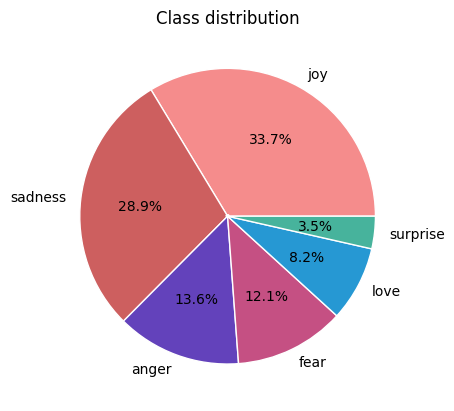

In [65]:
pie_chart(dataset,"Class distribution")

(array([ 40., 214., 356., 361., 421., 414., 402., 391., 415., 300., 347.,
        225., 279., 192., 182., 152., 111.,  94.,  95.,  75.,  70.,  46.,
         32.,  37.,  31.,  24.,  19.,  10.,  13.,  14.]),
 array([  9. ,  18.7,  28.4,  38.1,  47.8,  57.5,  67.2,  76.9,  86.6,
         96.3, 106. , 115.7, 125.4, 135.1, 144.8, 154.5, 164.2, 173.9,
        183.6, 193.3, 203. , 212.7, 222.4, 232.1, 241.8, 251.5, 261.2,
        270.9, 280.6, 290.3, 300. ]),
 <BarContainer object of 30 artists>)

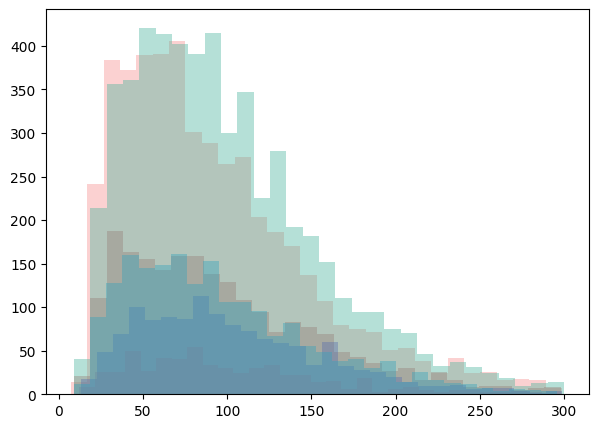

In [71]:
plt.figure(figsize=(7, 5))

plt.hist(lengths_sadness, bins=30, color='#f58c8c', alpha=0.4, label='Joy')
plt.hist(lengths_anger, bins=30, color='#cd5f5f', alpha=0.4, label='Joy')
plt.hist(lengths_love, bins=30, color='#6342bb', alpha=0.4, label='Joy')
plt.hist(lengths_surprise, bins=30, color='#c55083', alpha=0.4, label='Joy')
plt.hist(lengths_fear, bins=30, color='#2698d3', alpha=0.4, label='Joy')
plt.hist(lengths_joy, bins=30, color='#47b39c', alpha=0.4, label='Joy')

#deluje da je raspodela duzine tvitova priblizno ista za svaku klasu

# Nedostajuce vrednosti


In [81]:


dataset.isna().any().any()



False

In [82]:
#nema nedostajucih vrednosti


# Pretprocesiranje

In [ ]:
#mala slova > beline i znakovi >ponovljena slova > tokenizacija > filer reci > skracivanje > min duzina


In [98]:
def preprocess_dataset(sentence):
    sentence = str(sentence)
    #sentence = sentence.lower() #mala slova
    cleanr = re.compile(r'[^A-Za-z \']+')
    cleantext = re.sub(cleanr, ' ', sentence) #izbaci sve sto nije obican karakter 
    cleantext = re.sub(r"\b\d+\b", "", cleantext) #izbaci brojeve koji se ne pojavljuju unutar neke reci
    cleantext = re.sub(r'\b\w*([a-zA-Z])\1{2,}\w*\b', "", cleantext) #izbaci reci koje sadrze 3 ili vise uzastopna ponavljanja istog slova
    common_stopwords = set(stopwords.words('english'))
    
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(cleantext)
    
    tokens = [t for t in tokens if not t in common_stopwords]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    tokens = [token for token in tokens if len(token) >= 3]

    return tokens

# Prikaz procesovanog teksta


In [99]:
df = dataset.copy()
df["Processed "] = df["Text"].apply(preprocess_dataset).apply(lambda x: " ".join(x))


df_show = df.drop('Emotion', axis=1)
df_show.head(10)

,Text,Processed
0,i didnt feel humiliated,didnt feel humiliated
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,hopeless damned hopeful around someone care awake
2,im grabbing a minute to post i feel greedy wrong,grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,ever nostalgic fireplace know still property
4,i am feeling grouchy,grouchy
5,ive been feeling a little burdened lately wasnt sure why that was,ive little burdened lately wasnt sure
6,ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny,ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny
7,i feel as confused about life as a teenager or as jaded as a year old man,feel confused life teenager jaded year old man
8,i have been with petronas for years i feel that petronas has performed well and made a huge profit,petronas year feel petronas performed well made huge profit
9,i feel romantic too,feel romantic
